In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import vtk
from vtk.util import numpy_support as VN
from scipy import interpolate
import affine
import os.path
import copy

from Zeda_Auto_2D_RAS.Data_postprocess import Data_Postprocess

In [2]:
hdf_filename = ["case1fine.p01.hdf", "case1fine.p02.hdf", "case1fine.p03.hdf", "case1fine.p04.hdf",
                "case1fine.p05.hdf", "case1fine.p06.hdf", "case1fine.p07.hdf", "case1fine.p08.hdf",
                "case1fine.p09.hdf", "case1fine.p10.hdf", "case1fine.p11.hdf", "case1fine.p12.hdf",
                "case1fine.p13.hdf", "case1fine.p14.hdf", "case1fine.p15.hdf", "case1fine.p16.hdf",
                "case1fine.p17.hdf", "case1fine.p18.hdf", "case1fine.p19.hdf", "case1fine.p20.hdf",
                "case1fine.p21.hdf", "case1fine.p22.hdf", "case1fine.p23.hdf", "case1fine.p24.hdf",
                "case1fine.p25.hdf", "case1fine.p26.hdf", "case1fine.p27.hdf", "case1fine.p28.hdf",
                "case1fine.p29.hdf", "case1fine.p30.hdf", "case1fine.p31.hdf", "case1fine.p32.hdf",
                "case1fine.p33.hdf", "case1fine.p34.hdf", "case1fine.p35.hdf", "case1fine.p36.hdf",
                "case1fine.p37.hdf", "case1fine.p38.hdf", "case1fine.p39.hdf", "case1fine.p40.hdf",
                "case1fine.p41.hdf", "case1fine.p42.hdf", "case1fine.p43.hdf", "case1fine.p44.hdf",
                "case1fine.p45.hdf", "case1fine.p46.hdf"]

In [3]:
dir_path = 'C:/BC2MAP/fine/'

In [4]:
hdf2DAreaCell6D = np.zeros((46, 221184, 6))

In [5]:
for i in range (len(hdf_filename)):
    post = Data_Postprocess(hdf_filename[i], dir_path)
    
    hdf2DAreaCellCoordinates3D = post.get_3D_data(hdf_filename[i], dir_path)
    
    hdf2DAreaCellMaxWSE = post.get_max_WSE(hdf_filename[i], dir_path)
    
    hdf2DAreaCell6D[i, :, :] = post.get_entire_numpy_dataset(hdf2DAreaCellCoordinates3D, hdf2DAreaCellMaxWSE)
    

In [6]:
for i in range (len(hdf_filename)):
    saved_pd = pd.DataFrame(hdf2DAreaCell6D[i, :, :], columns = ['X','Y','Z','Elevation','WSE','Depth'])
    sorted_pd = saved_pd.sort_values(by=['X', 'Y']).reset_index(drop=True)
    sorted_pd.to_csv('Saved data/fine_{}.csv'.format(i), index=False)

### show how to make plot

In [7]:
pd6D = pd.DataFrame(hdf2DAreaCell6D[43, :, :], columns = ['X','Y','Z','Elevation','WSE','Depth'])

sorted_pd6D = pd6D.sort_values(by=['X', 'Y']).reset_index(drop=True)

In [8]:
unique_counts = sorted_pd6D.nunique()
unique_counts

X               576
Y               384
Z                 1
Elevation    126756
WSE          123016
Depth         29240
dtype: int64

In [9]:
def reshape_to_2d(inputdf):
    X = inputdf
    X = X.values
    X_2d = np.reshape(X, (576, 384))
    return X_2d

In [10]:
X_2d = reshape_to_2d(sorted_pd6D['X'])
Y_2d = reshape_to_2d(sorted_pd6D['Y'])
Depth_2d = reshape_to_2d(sorted_pd6D['Depth'])
Elevation_2d = reshape_to_2d(sorted_pd6D['Elevation'])
WSE_2d = reshape_to_2d(sorted_pd6D['WSE'])

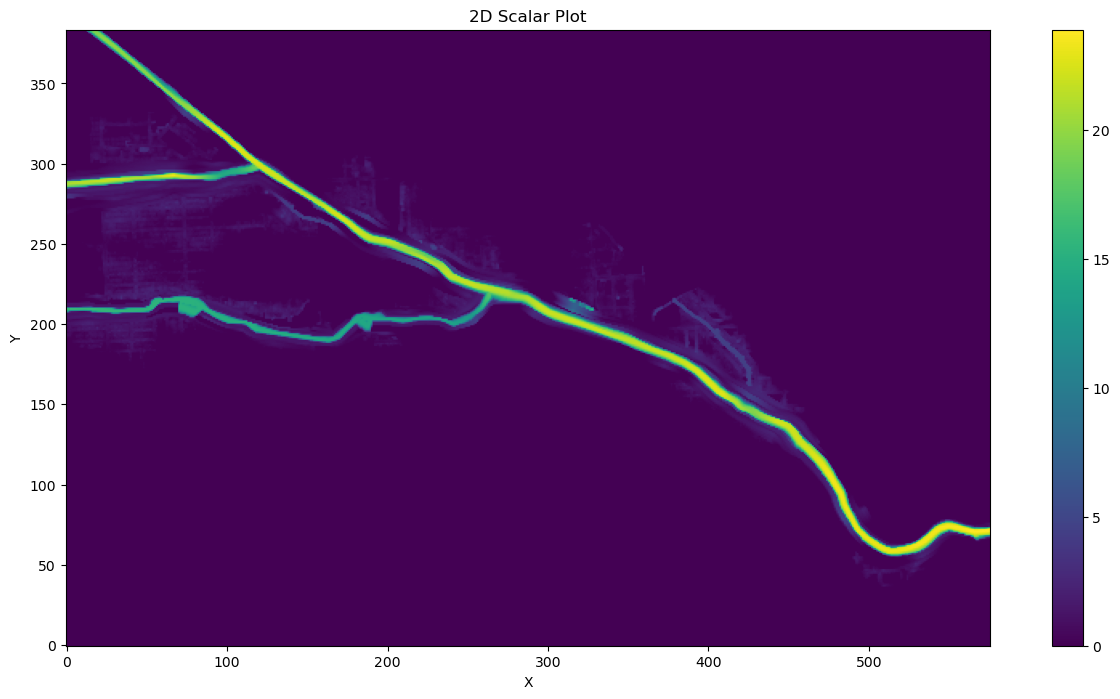

In [11]:
plt.rcParams['figure.figsize'] = [16, 8]

# Assuming you have a 2D scalar value represented as a NumPy array called 'scalar_data'
plt.imshow(Depth_2d.transpose(), cmap='viridis', origin='lower')
plt.colorbar()  # Add a colorbar for reference

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scalar Plot')

# Show the plot
plt.show()

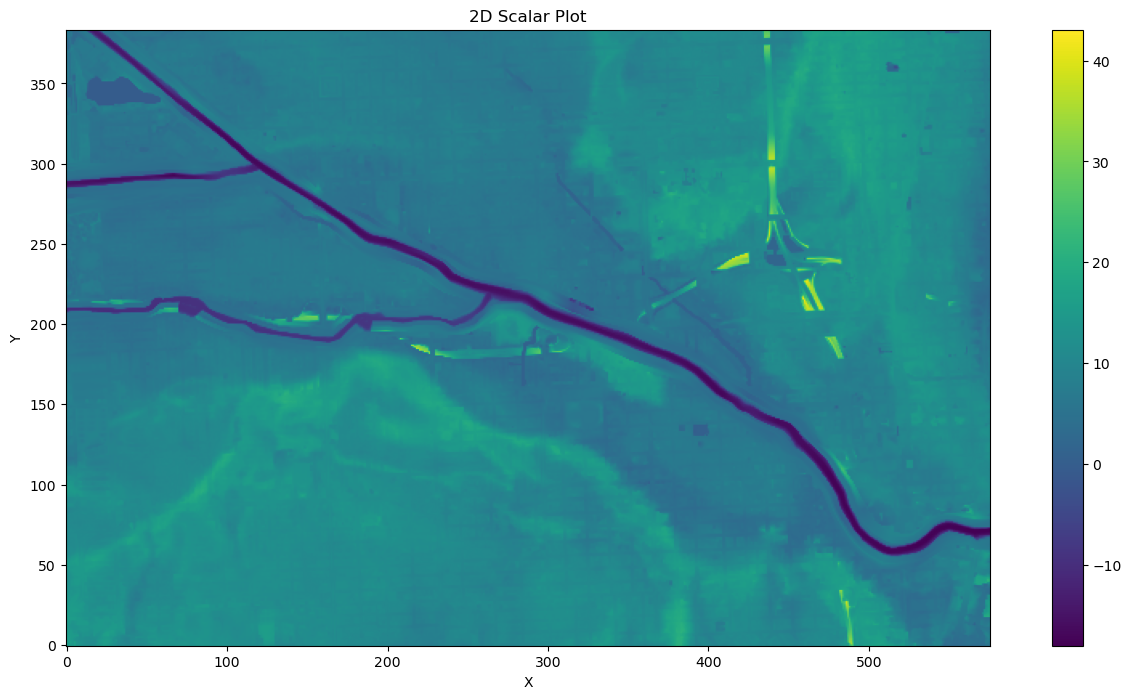

In [12]:
plt.rcParams['figure.figsize'] = [16, 8]

# Assuming you have a 2D scalar value represented as a NumPy array called 'scalar_data'
plt.imshow(Elevation_2d.transpose(), cmap='viridis', origin='lower')
plt.colorbar()  # Add a colorbar for reference

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Scalar Plot')

# Show the plot
plt.show()